In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
df=pd.read_csv("HR_Comma_Sep.csv")
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
left=df[df.left==1]
left.shape

(3571, 11)

In [8]:
retained=df[df.left==0]
retained.shape

(11428, 11)

In [9]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


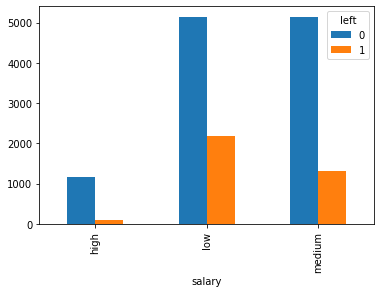

In [10]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

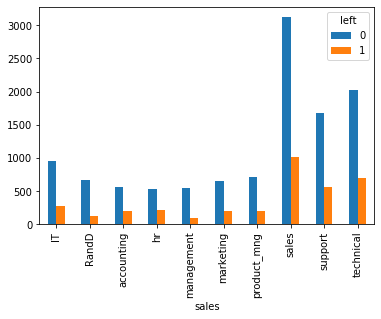

In [12]:
pd.crosstab(df.sales, df.left).plot(kind='bar')

In [14]:
subdf=df[['satisfaction_level', 'average_montly_hours','promotion_last_5years', 'salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [21]:
dummies=pd.get_dummies(df['salary'], prefix='salary')
dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [22]:
merged=pd.concat([subdf, dummies], axis='columns')
merged.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [23]:
final=merged.drop(['salary','salary_low'], axis='columns')
final.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_medium
0,0.38,157,0,0,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,0,0
4,0.37,159,0,0,0


In [26]:
x=final
y=df.left
x.head()


,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_medium
0,0.38,157,0,0,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,0,0
4,0.37,159,0,0,0


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.2)
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_medium
4891,0.95,204,0,0,1
4638,0.97,241,0,0,0
14531,0.41,153,0,0,0
10557,0.81,101,0,0,1
9887,0.58,272,0,0,1
...,...,...,...,...,...
1308,0.09,266,0,0,1
13823,0.58,207,0,0,0
12279,0.82,233,0,0,0
8635,0.88,123,0,0,0


In [28]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
model.score(X_test, y_test)

0.7806666666666666